In [1]:
import numpy as np
from classfunctions import NbodyClass
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D

In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/elizabeth/.local/lib/python3.6/site-packages/matplo

### Part 2: Two particles moving in a circle

This part shows two particles in a non-periodic system moving in a circlular orbit around eachother.

Note that circular with two particles implies that motion is going to occur along a single plane, one plane where the particles begin initially seperated, and another plane where there is some initial velocity. In this case it makes the most sense for ease of plotting to seperate the particles in one of the x,y,z axis and add velocity in another of the x,y,z axis. The problem is still solved in 3D, but the plotting can be done in 2D as the only motion occurs in a plane.

MAYBE SHOW: softening 4, softening 3.
MAYBE CHANGE: granularity of matrix.

In [5]:
# #Two particles moving in a circle. Pick initial conditions such that it's a circle.

num_part = 2
steps = 15*10**3 + 1
# steps=100
spread = 20
# pos = np.array([[7, 13],[7, 13], [10, 10]])
pos = np.array([[10, 10],[5, 15], [10, 10]])
# v = np.sqrt(1/(4*np.pi*(15-5)))
# print(v)
vel = np.array([[-0.05, +0.05], [0, 0], [0, 0]])
nbody2 = NbodyClass(pos, vel, dt=0.1, sgrid=spread, periodic=False, gradient=True)


data = np.zeros( (3, num_part, steps) )

for ii in range(0, steps):
    nbody2.take_step(DEBUG=False)
    try:
        if nbody2.x.shape[1] < 2:
            print('We lost a particle! break')
            break
        data[:, :, ii] = nbody2.x
    except Exception as e:
        print(str(e))
        print('probably went out of range, stopping at ', ii)
        break
    if ii%10**3 == 0:
        print('ii is ', ii)
#     print(nbody2.x)

ii is  0
ii is  1000
ii is  2000
ii is  3000
ii is  4000
ii is  5000
ii is  6000
ii is  7000
ii is  8000
ii is  9000
ii is  10000
ii is  11000
ii is  12000
ii is  13000
ii is  14000
ii is  15000


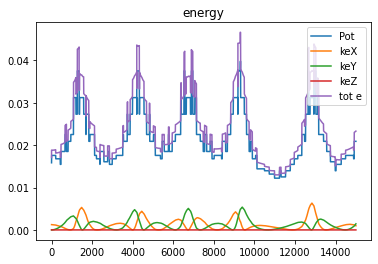

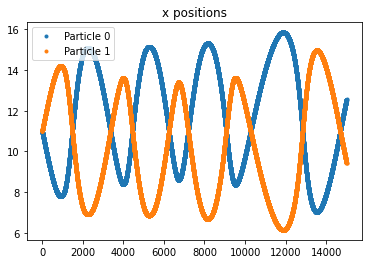

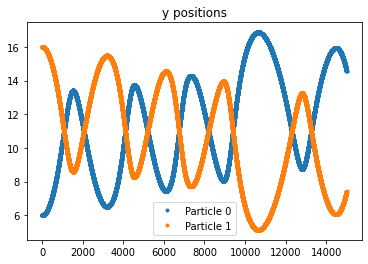

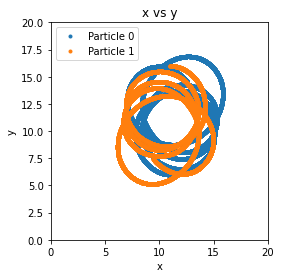

In [6]:
mpl.figure()
mpl.plot(range(0, steps), nbody2.pe[:steps])
mpl.plot(range(0, steps), nbody2.ke[0, :steps])
mpl.plot(range(0, steps), nbody2.ke[1, :steps])
mpl.plot(range(0, steps), nbody2.ke[2, :steps])
mpl.plot(range(0, steps), nbody2.pe[:steps] + np.sum(nbody2.ke, axis=0)[:steps])
mpl.legend(['Pot', 'keX', 'keY', 'keZ', 'tot e'])
mpl.title('energy')
mpl.show()

mpl.figure()
mpl.plot(range(0, steps), data[0, 0, :], '.')
mpl.plot(range(0, steps), data[0, 1, :], '.')
mpl.legend(['Particle 0', 'Particle 1'])
mpl.title('x positions')
mpl.show()

mpl.figure()
mpl.plot(range(0, steps), data[1, 0, :], '.')
mpl.plot(range(0, steps), data[1, 1, :], '.')
mpl.legend(['Particle 0', 'Particle 1'])
mpl.title('y positions')
mpl.show()

mpl.figure()
mpl.plot(data[0, 0, :], data[1, 0, :], '.')
mpl.plot(data[0, 1, :], data[1, 1, :], '.')
mpl.legend(['Particle 0', 'Particle 1'])
mpl.title('x vs y')
mpl.xlabel('x')
mpl.ylabel('y')
mpl.axis('square')
mpl.xlim([0, 20])
mpl.ylim([0, 20])
mpl.show()

# mpl.figure()
# mpl.plot(range(0, steps), data[0, 0, :] - data[0, 1, :], '.')
# mpl.plot(range(0, steps), data[1, 0, :] - data[1, 1, :], '.')
# mpl.legend(['X closeness', 'Y closeness'])
# mpl.title('part 1 - part 2 pos')
# mpl.xlabel('steps')
# mpl.ylabel('diff')
# mpl.show()